In [1]:
import re
import pandas as pd

In [2]:
f = open("D:\Arjun python\shailendra.txt",'r', encoding = 'utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

[23/01/22, 8:58:54 PM] Shailendra : ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
‎[23/01/22, 8:58:54 PM] Arjun Verma: ‎Contact card omitted
‎[23/01/22, 9:06:09 PM] Shailendra : Q45.pdf • ‎7 pages ‎document omitted
[23/01/22, 9:06:51 PM] Arjun Verma: Thanks bro
[23/01/22, 9:07:00 PM] Shailendra : Wlcm
‎[23/01/22, 9:07:49 PM] Shailendra : Shailendra's Resume (5) (1).pdf • ‎1 page ‎document omitted
[23/01/22, 9:09:24 PM] Arjun Verma: Shi h resume toh 👍🏻
[23/01/22, 9:09:32 PM] Shailendra : Thanku
[23/01/22, 9:09:43 PM] Shailendra : Globusoft ka question dekha
[23/01/22, 9:09:45 PM] Shailendra : ???
[23/01/22, 9:10:37 PM] Arjun Verma: Hn dekha
[23/01/22, 9:10:44 PM] Shailendra : Maja ayya
[23/01/22, 9:10:47 PM] Shailendra : 😂😂😂😂
[23/01/22, 9:11:23 PM] Arjun Verma: Hmm 😅
[23/01/22, 9:13:58 PM] Shailendra : 😂😂
[23/01/22, 9:14:09 PM] Shailendra : Chlo kabhi Delhi anna hua to miluga mai tumse
[23/01/22, 9:14:14 PM] Sha

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}:\d{2}\s\w{2}'

In [6]:
dates = re.findall(pattern, data)
dates

['23/01/22, 8:58:54 PM',
 '23/01/22, 8:58:54 PM',
 '23/01/22, 9:06:09 PM',
 '23/01/22, 9:06:51 PM',
 '23/01/22, 9:07:00 PM',
 '23/01/22, 9:07:49 PM',
 '23/01/22, 9:09:24 PM',
 '23/01/22, 9:09:32 PM',
 '23/01/22, 9:09:43 PM',
 '23/01/22, 9:09:45 PM',
 '23/01/22, 9:10:37 PM',
 '23/01/22, 9:10:44 PM',
 '23/01/22, 9:10:47 PM',
 '23/01/22, 9:11:23 PM',
 '23/01/22, 9:13:58 PM',
 '23/01/22, 9:14:09 PM',
 '23/01/22, 9:14:14 PM',
 '23/01/22, 9:14:18 PM',
 '24/01/22, 9:40:54 AM',
 '24/01/22, 9:40:57 AM',
 '24/01/22, 9:41:04 AM',
 '24/01/22, 9:41:14 AM',
 '24/01/22, 9:47:45 AM',
 '24/01/22, 9:49:05 AM',
 '24/01/22, 9:49:36 AM',
 '24/01/22, 9:49:44 AM',
 '24/01/22, 9:49:51 AM',
 '24/01/22, 9:49:55 AM',
 '24/01/22, 9:50:02 AM',
 '24/01/22, 9:50:09 AM',
 '24/01/22, 9:50:22 AM',
 '24/01/22, 9:50:30 AM',
 '24/01/22, 9:50:38 AM',
 '24/01/22, 7:00:42 PM',
 '24/01/22, 7:00:45 PM',
 '26/01/22, 11:04:46 AM',
 '26/01/22, 11:07:17 AM',
 '26/01/22, 11:07:42 AM',
 '26/01/22, 11:07:50 AM',
 '26/01/22, 11:07:55 

In [7]:
messages = re.split(pattern, data)[1:]

In [8]:
df = pd.DataFrame({'user_message':messages, 'message_dates': dates})

In [9]:
df['message_dates'] = pd.to_datetime(df['message_dates'], infer_datetime_format=True)

In [10]:
df.head()

,user_message,message_dates
0,] Shailendra : ‎Messages and calls are end-to-...,2022-01-23 20:58:54
1,] Arjun Verma: ‎Contact card omitted\n‎[,2022-01-23 20:58:54
2,] Shailendra : Q45.pdf • ‎7 pages ‎document om...,2022-01-23 21:06:09
3,] Arjun Verma: Thanks bro\n[,2022-01-23 21:06:51
4,] Shailendra : Wlcm\n‎[,2022-01-23 21:07:00


In [11]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"\[", " ", phrase)
    phrase = re.sub(r"\]", " ", phrase)
    phrase = re.sub(r"\n", " ", phrase)
    return phrase

from tqdm import tqdm
preprocessed_messages = []

#tqdm is for printing the status bar
for sentence in tqdm(df['user_message'].values):
    sentence = decontracted(sentence)
    preprocessed_messages.append(sentence.strip())

100%|████████████████████████████████████████████████████████████████████████████████████████| 190/190 [00:00<?, ?it/s]


In [12]:
df['preprocessed_messages'] = preprocessed_messages

In [13]:
df.rename(columns = {'preprocessed_messages':'messages', "message_dates":'dates'}, inplace = True)
df.drop('user_message', axis = 1, inplace = True)

In [14]:
df

,dates,messages
0,2022-01-23 20:58:54,Shailendra : ‎Messages and calls are end-to-en...
1,2022-01-23 20:58:54,Arjun Verma: ‎Contact card omitted ‎
2,2022-01-23 21:06:09,Shailendra : Q45.pdf • ‎7 pages ‎document omitted
3,2022-01-23 21:06:51,Arjun Verma: Thanks bro
4,2022-01-23 21:07:00,Shailendra : Wlcm ‎
...,...,...
185,2022-10-24 15:34:56,Arjun Verma: Tension not
186,2022-10-24 15:35:51,Arjun Verma: Banaras hi ho toh kya tension h L...
187,2022-10-24 16:05:04,Shailendra : Hmm.m ‎
188,2022-01-12 20:01:25,Arjun Verma: Arjun.pdf • ‎2 pages ‎document om...


In [15]:
users = []
clean_messages = []
for message in df['messages']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        clean_messages.append(entry[2])
    else:
        users.append("Group Notification")
        clean_messages.append(entry[2])

df['User'] = users
df['Clean_messages'] = clean_messages
df.drop(columns=['messages'], inplace=True)
df

,dates,User,Clean_messages
0,2022-01-23 20:58:54,Shailendra,‎Messages and calls are end-to-end encrypted. ...
1,2022-01-23 20:58:54,Arjun Verma,‎Contact card omitted ‎
2,2022-01-23 21:06:09,Shailendra,Q45.pdf • ‎7 pages ‎document omitted
3,2022-01-23 21:06:51,Arjun Verma,Thanks bro
4,2022-01-23 21:07:00,Shailendra,Wlcm ‎
...,...,...,...
185,2022-10-24 15:34:56,Arjun Verma,Tension not
186,2022-10-24 15:35:51,Arjun Verma,Banaras hi ho toh kya tension h Lucknow me hot...
187,2022-10-24 16:05:04,Shailendra,Hmm.m ‎
188,2022-01-12 20:01:25,Arjun Verma,Arjun.pdf • ‎2 pages ‎document omitted


In [16]:
df['year'] = df['dates'].dt.year
df['month'] = df['dates'].dt.month_name()
df['day'] = df['dates'].dt.day
df['hour'] = df['dates'].dt.hour
df['minutes'] = df['dates'].dt.minute

In [17]:
df.head()

,dates,User,Clean_messages,year,month,day,hour,minutes
0,2022-01-23 20:58:54,Shailendra,‎Messages and calls are end-to-end encrypted. ...,2022,January,23,20,58
1,2022-01-23 20:58:54,Arjun Verma,‎Contact card omitted ‎,2022,January,23,20,58
2,2022-01-23 21:06:09,Shailendra,Q45.pdf • ‎7 pages ‎document omitted,2022,January,23,21,6
3,2022-01-23 21:06:51,Arjun Verma,Thanks bro,2022,January,23,21,6
4,2022-01-23 21:07:00,Shailendra,Wlcm ‎,2022,January,23,21,7


In [18]:
words = []
for message in df['Clean_messages']:
    words.extend(message.split())
 

In [19]:
len(words)

861

In [20]:
def fetch_stats(selected_user, df):
    if selected_user == 'Overall':
        # 1. fetch number of messages
        num_messages = df.shape[0]
        # 2. number of words
        words = []
        for message in df['Clean_messages']:
            words.extend(message.split())
        return num_messages, len(words)
    else:
        new_df = df[df['User'] == selected_user]
        num_messages = new_df.shape[0]
        words = []
        for message in new_df['Clean_messages']:
            words.extend(message.split())
        return num_messages, len(words)


In [21]:
media = df[df['Clean_messages'].str.contains(pat = str('omitted'), case = False)]

In [22]:
len(media)

14

In [23]:
#!pip install urlextract
from urlextract import URLExtract

In [24]:
extractor = URLExtract()
links = []
for link in df['Clean_messages']:
    links.extend(extractor.find_urls(link))

In [25]:
df['User'].value_counts()/df.shape[0]

Shailendra     0.6
Arjun Verma    0.4
Name: User, dtype: float64

In [26]:
new_df = round((df['User'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(
        columns={'index': 'name', 'User': 'percent'})  

In [27]:
new_df

,name,percent
0,Shailendra,60.0
1,Arjun Verma,40.0


In [28]:
df['Clean_messages'].str.contains(pat = str('omitted'), case = False)

0      False
1       True
2       True
3      False
4      False
       ...  
185    False
186    False
187    False
188     True
189    False
Name: Clean_messages, Length: 190, dtype: bool

In [29]:
#temp = df[df['Clean_messages'] != df['Clean_messages'].str.contains(pat = str('omitted'), case = False)]

In [30]:
index = df[df['Clean_messages'].str.contains(pat = str('omitted'), case = False)].index

In [31]:
index

Int64Index([1, 2, 5, 40, 101, 103, 130, 132, 134, 142, 149, 156, 159, 188], dtype='int64')

In [32]:
temp = df.drop(axis = 0, index = index)

In [33]:
temp

,dates,User,Clean_messages,year,month,day,hour,minutes
0,2022-01-23 20:58:54,Shailendra,‎Messages and calls are end-to-end encrypted. ...,2022,January,23,20,58
3,2022-01-23 21:06:51,Arjun Verma,Thanks bro,2022,January,23,21,6
4,2022-01-23 21:07:00,Shailendra,Wlcm ‎,2022,January,23,21,7
6,2022-01-23 21:09:24,Arjun Verma,Shi h resume toh 👍🏻,2022,January,23,21,9
7,2022-01-23 21:09:32,Shailendra,Thanku,2022,January,23,21,9
...,...,...,...,...,...,...,...,...
184,2022-10-24 15:34:52,Arjun Verma,Dengue thik hojyega jldi,2022,October,24,15,34
185,2022-10-24 15:34:56,Arjun Verma,Tension not,2022,October,24,15,34
186,2022-10-24 15:35:51,Arjun Verma,Banaras hi ho toh kya tension h Lucknow me hot...,2022,October,24,15,35
187,2022-10-24 16:05:04,Shailendra,Hmm.m ‎,2022,October,24,16,5


In [34]:
f = open('hinglish.txt', 'r')
stop_words = f.read()
print(stop_words)

acha
achaa
???
hein
baat
chl
tumse
shi
phn
hn
.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
c

In [35]:
words = []

for message in temp['Clean_messages']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word.split())

In [36]:
words

[['\u200emessages'],
 ['calls'],
 ['end-to-end'],
 ['encrypted.'],
 ['chat,'],
 ['whatsapp,'],
 ['listen'],
 ['them.'],
 ['\u200e'],
 ['wlcm'],
 ['\u200e'],
 ['resume'],
 ['👍🏻'],
 ['thanku'],
 ['globusoft'],
 ['question'],
 ['maja'],
 ['ayya'],
 ['😂😂😂😂'],
 ['😅'],
 ['😂😂'],
 ['chlo'],
 ['delhi'],
 ['anna'],
 ['miluga'],
 ['laga'],
 ['bhaie'],
 ['ajj'],
 ['luga'],
 ['krlena'],
 ['btana'],
 ['arjun'],
 ['mila'],
 ['friend'],
 ['ajj'],
 ['office'],
 ['period'],
 ['call'],
 ['uthaye'],
 ['uthaye'],
 ['office'],
 ['arvind'],
 ['bje'],
 ['ruko'],
 ['leta'],
 ['krlena'],
 ['2:45'],
 ['tk'],
 ['lena'],
 ['thanku'],
 ['bhaie'],
 ['bhaiee'],
 ['arey'],
 ['km'],
 ['15'],
 ['20'],
 ['lms'],
 ['sql'],
 ['\u200e'],
 ['bus'],
 ['sql'],
 ['join'],
 ['video'],
 ['dekhni'],
 ['achaaa'],
 ['15'],
 ['20'],
 ['kaam'],
 ['bus'],
 ['naha'],
 ['dho'],
 ['aau'],
 ['share'],
 ['share'],
 ['tb'],
 ['tk'],
 ['khin'],
 ['search'],
 ['krta'],
 ['haii'],
 ['atta'],
 ['ghante'],
 ['share'],
 ['suga'],
 ['duga*'],
 ['👍🏻

In [37]:
words = []

for message in temp['Clean_messages']:
    for word in message.lower().split():
        if word not in stop_words:
            words.extend(word.split())

In [38]:
from collections import Counter
df_mc = pd.DataFrame(Counter(words).most_common(20))

In [39]:
import emoji

In [40]:
emojis = []
for message in df['Clean_messages']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [41]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,16
1,👍,4
2,🏻,3
3,😅,3


In [42]:
df.keys()

Index(['dates', 'User', 'Clean_messages', 'year', 'month', 'day', 'hour',
       'minutes'],
      dtype='object')

In [43]:
df['month_num'] = df['dates'].dt.month

In [44]:
timeline = df.groupby(['year','month_num', 'month']).count()['Clean_messages'].reset_index()

In [45]:
timeline

,year,month_num,month,Clean_messages
0,2022,1,January,117
1,2022,5,May,5
2,2022,8,August,40
3,2022,9,September,1
4,2022,10,October,27


In [46]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+ "-" + str(timeline['year'][i]))

In [47]:
timeline['time'] = time

In [48]:
timeline

,year,month_num,month,Clean_messages,time
0,2022,1,January,117,January-2022
1,2022,5,May,5,May-2022
2,2022,8,August,40,August-2022
3,2022,9,September,1,September-2022
4,2022,10,October,27,October-2022


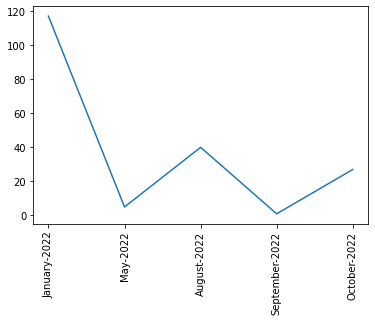

In [49]:
import matplotlib.pyplot as plt
plt.plot(timeline['time'], timeline['Clean_messages'])
plt.xticks(rotation = 'vertical')
plt.show()

In [50]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['Clean_messages'].reset_index()

In [51]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))
timeline['time'] = time

In [52]:
timeline['time'] = time

In [53]:
timeline

,year,month_num,month,Clean_messages,time
0,2022,1,January,117,January-2022
1,2022,5,May,5,May-2022
2,2022,8,August,40,August-2022
3,2022,9,September,1,September-2022
4,2022,10,October,27,October-2022


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

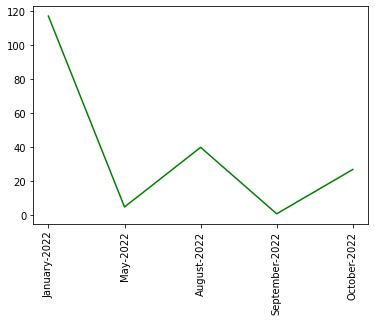

In [54]:
#timeline = helper.month_timeline(selected_user, df)
fig, ax = plt.subplots()
ax.plot(timeline['time'], timeline['Clean_messages'], color='green')
plt.xticks(rotation='vertical')
        

In [55]:
    timeline = df.groupby(['year', 'month_num', 'month']).count()['Clean_messages'].reset_index()
    time = []
    for i in range(timeline.shape[0]):
        time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

    timeline['time'] = time
    


In [56]:
timeline

,year,month_num,month,Clean_messages,time
0,2022,1,January,117,January-2022
1,2022,5,May,5,May-2022
2,2022,8,August,40,August-2022
3,2022,9,September,1,September-2022
4,2022,10,October,27,October-2022


In [61]:
df['day_name'] = df['dates'].dt.day_name()

In [62]:
df.head()

,dates,User,Clean_messages,year,month,day,hour,minutes,month_num,day_name
0,2022-01-23 20:58:54,Shailendra,‎Messages and calls are end-to-end encrypted. ...,2022,January,23,20,58,1,Sunday
1,2022-01-23 20:58:54,Arjun Verma,‎Contact card omitted ‎,2022,January,23,20,58,1,Sunday
2,2022-01-23 21:06:09,Shailendra,Q45.pdf • ‎7 pages ‎document omitted,2022,January,23,21,6,1,Sunday
3,2022-01-23 21:06:51,Arjun Verma,Thanks bro,2022,January,23,21,6,1,Sunday
4,2022-01-23 21:07:00,Shailendra,Wlcm ‎,2022,January,23,21,7,1,Sunday


In [64]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period

In [65]:
df.head()


,dates,User,Clean_messages,year,month,day,hour,minutes,month_num,day_name,period
0,2022-01-23 20:58:54,Shailendra,‎Messages and calls are end-to-end encrypted. ...,2022,January,23,20,58,1,Sunday,20-21
1,2022-01-23 20:58:54,Arjun Verma,‎Contact card omitted ‎,2022,January,23,20,58,1,Sunday,20-21
2,2022-01-23 21:06:09,Shailendra,Q45.pdf • ‎7 pages ‎document omitted,2022,January,23,21,6,1,Sunday,21-22
3,2022-01-23 21:06:51,Arjun Verma,Thanks bro,2022,January,23,21,6,1,Sunday,21-22
4,2022-01-23 21:07:00,Shailendra,Wlcm ‎,2022,January,23,21,7,1,Sunday,21-22


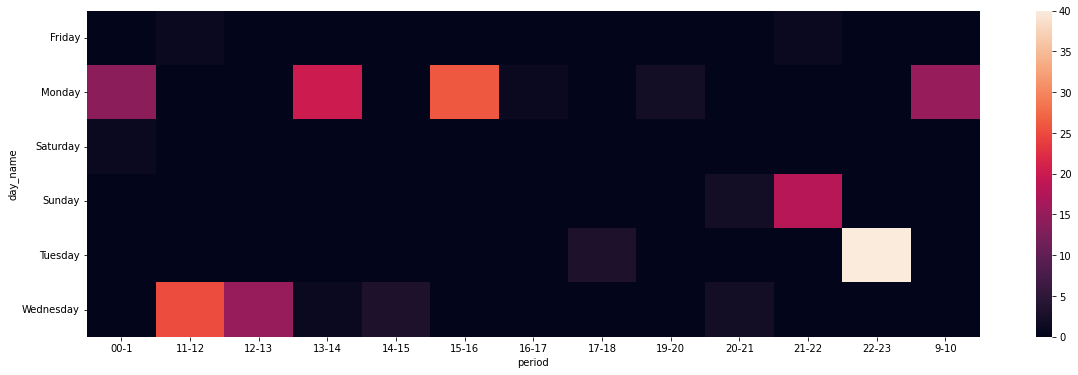

In [68]:
import seaborn as sns
plt.figure(figsize = (20,6))
sns.heatmap(df.pivot_table(index = 'day_name', columns = 'period', values = 'Clean_messages', aggfunc = 'count').fillna(0))
plt.yticks(rotation = 'horizontal')
plt.show()